In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Trees.Tree import TreeClassifier
from metrics import mse, accuracy
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex'], axis=1)
dataset.sample(4)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
176,Chinstrap,46.7,17.9,195.0,3300.0
206,Chinstrap,42.5,17.3,187.0,3350.0
35,Adelie,39.2,21.1,196.0,4150.0
123,Adelie,41.4,18.5,202.0,3875.0


In [3]:
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
# test = test.drop('species', axis=1)
model = TreeClassifier(metric=accuracy, criterion='entropy', max_depth=3, debug=False)
model.fit(train, target='species')
model.predict(test, predict_col='pred')

In [4]:
accuracy(test['pred'], test['species'])

0.9492753623188406

In [5]:
from sklearn import datasets
blobs = datasets.make_blobs(n_samples=1234, random_state=42, centers=5, cluster_std=2)

In [6]:
df_train = pd.DataFrame(blobs[0], columns=['x1', 'x2'])
df_train['target'] = blobs[1]

df_test = pd.DataFrame()
df_test['x1'] = np.random.uniform(-10, 10, 1000)
df_test['x2'] = np.random.uniform(-10, 10, 1000)

<AxesSubplot:xlabel='x1', ylabel='x2'>

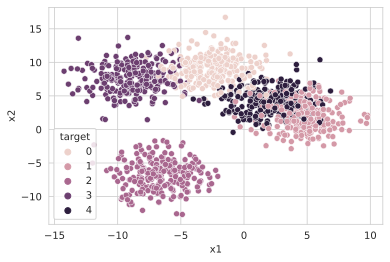

In [7]:
sns.scatterplot(data=df_train, x='x1', y='x2', hue='target')

2    247
1    247
0    247
3    247
4    246
Name: target, dtype: int64
feature:x1 classes{'left': 2, 'right': 1}split_predict0.40032414910858993,

feature:x2 classes{'left': 2, 'right': 0}split_predict0.40032414910858993,

{'best_score': 0.40032414910858993, 'best_feature': 'x1', 'best_threshold': -1.7704651149512247, 'left_value': 2, 'right_value': 1} 
------------------------------

2    247
3    247
0    171
4      7
Name: target, dtype: int64
feature:x1 classes{'left': 3, 'right': 0}split_predict0.5877976190476191,

feature:x2 classes{'left': 2, 'right': 3}split_predict0.7351190476190477,

{'best_score': 0.7351190476190477, 'best_feature': 'x2', 'best_threshold': -0.11699885937250709, 'left_value': 2, 'right_value': 3} 
------------------------------

1    247
4    239
0     76
Name: target, dtype: int64
feature:x1 classes{'left': 4, 'right': 1}split_predict0.604982206405694,

feature:x2 classes{'left': 1, 'right': 0}split_predict0.5516014234875445,

{'best_score': 0.6049822064056

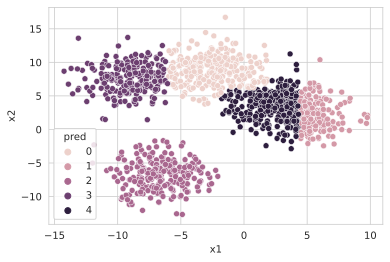

In [8]:
model = TreeClassifier(metric=accuracy, criterion='entropy', max_depth=3)
model.fit(df_train, target='target')
model.predict(df_train, predict_col='pred')
ax = sns.scatterplot(data=df_train, x='x1', y='x2', hue='pred')
# ax.set(xlim = (-12, 7), ylim=(-10, 10))
plt.show()

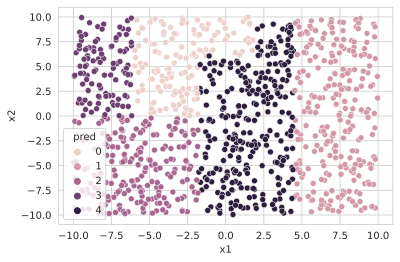

In [9]:
model.predict(df_test, predict_col='pred')
ax = sns.scatterplot(data=df_test, x='x1', y='x2', hue='pred')


In [21]:
from Trees.RandomForest import RandomForest

dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex'], axis=1)
train, test = train_test_split(dataset, train_size=0.6, shuffle=True, random_state=42)
train

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
96,Adelie,38.1,18.6,190.0,3700.0
262,Gentoo,45.3,13.7,210.0,4300.0
97,Adelie,40.3,18.5,196.0,4350.0
182,Chinstrap,40.9,16.6,187.0,3200.0
68,Adelie,35.9,16.6,190.0,3050.0
...,...,...,...,...,...
188,Chinstrap,47.6,18.3,195.0,3850.0
71,Adelie,39.7,18.4,190.0,3900.0
106,Adelie,38.6,17.2,199.0,3750.0
270,Gentoo,46.6,14.2,210.0,4850.0


In [25]:

model = RandomForest(n_estimators=100, criterion='entropy', max_depth=4, max_features=2, random_state=42, n_jobs=-1, subsample=0.6, debug=False)
model.fit(train, 'species')

find threshold in: 32.6 58.8
find threshold in: 2775.0 6175.0
find threshold in: 32.6 42.25
find threshold in: 2850.0 4675.0
find threshold in: 42.5 58.8
find threshold in: 2800.0 6175.0
find threshold in: 32.6 42.25
find threshold in: 2850.0 4437.5
find threshold in: 42.5 56.9
find threshold in: 2800.0 4150.0
find threshold in: 43.0 57.35
find threshold in: 4250.0 6175.0
find threshold in: 41.0 42.25
find threshold in: 3200.0 4350.0
find threshold in: 42.5 44.3
find threshold in: 3125.0 4100.0
find threshold in: 43.0 48.75
find threshold in: 4250.0 5925.0
find threshold in: 49.1 57.35
find threshold in: 4350.0 6175.0
find threshold in: 173.0 230.0
find threshold in: 32.6 58.8
find threshold in: 173.0 205.5
find threshold in: 32.6 55.75
find threshold in: 207.0 230.0
find threshold in: 40.849999999999994 57.7
find threshold in: 173.0 203.5
find threshold in: 32.6 42.25
find threshold in: 183.0 205.5
find threshold in: 42.5 55.75
find threshold in: 207.0 212.0
find threshold in: 41.25 5

KeyboardInterrupt: 

In [23]:
pred = model.predict(test)

In [24]:
accuracy(pred, test['species'])

0.8840579710144928